In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('housing.xls')
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
dataset = dataset.fillna(value=dataset.total_bedrooms.mean())

In [6]:
X = dataset.iloc[:,:-2]
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [7]:
dummies = pd.get_dummies(dataset.ocean_proximity)
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [8]:
X = pd.concat([dummies,X],axis = 1)

In [9]:
X.head(10)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,0,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,0,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,0,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,0,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
5,0,0,0,1,0,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368
6,0,0,0,1,0,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591
7,0,0,0,1,0,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200
8,0,0,0,1,0,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804
9,0,0,0,1,0,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912


In [10]:
X = X.drop('<1H OCEAN',axis = 1)
X.head(10)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
5,0,0,1,0,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368
6,0,0,1,0,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591
7,0,0,1,0,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200
8,0,0,1,0,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804
9,0,0,1,0,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912


In [11]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
x = X.iloc[:,-1:].values
y = dataset.iloc[:,8:9].values

In [13]:
x

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

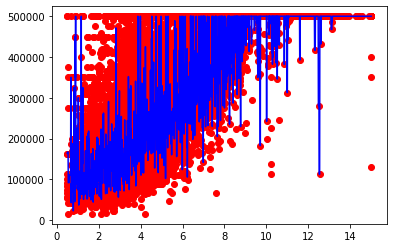

In [15]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

In [16]:
from sklearn.metrics import r2_score
a = r2_score(regressor.predict(x),y)
print(a)

0.7695876670039818


In [17]:
x = X.iloc[:,:].values
y = dataset.iloc[:,8:9].values

In [18]:
x

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 3.2200e+02, 1.2600e+02,
        8.3252e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.4010e+03, 1.1380e+03,
        8.3014e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 4.9600e+02, 1.7700e+02,
        7.2574e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3870e+03, 5.3000e+02,
        2.3886e+00]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state =0)

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [21]:
from sklearn.metrics import r2_score
a = r2_score(regressor.predict(X_test),y_test)
print(a)

0.663222558858831
